# Implementing SVM_Boosting 

By:

IIT2018109 (Meghna)

IIT2018145 (Riya)

IIT2018169 (Vidhi)

IIT2018173 (Nandini)

IIT2018504 (Chaitali)

In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

Importing Datasets 

In [ ]:
Datam = pd.read_csv("/content/Magic.csv")
Datal = pd.read_csv("/content/letter-recognition.csv")
Datal=Datal.rename({'letter': 'class'}, axis=1)

In [ ]:
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


Making Changes to the datasets so that resampling can be applied.

In [ ]:
Datam = Datam.sample(frac=1,random_state=42).reset_index(drop=True)
Datam=Datam.drop(['Unnamed: 0'],axis = 1)
Datam

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,g
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,g
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,g
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,g
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,g


Replacing values of class to numeric.

In [ ]:
Datal=Datal.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M'],1)

In [ ]:
Datal=Datal.replace(['N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],-1)
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,-1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,1,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,-1,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,-1,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
m=len(Datam['class'])
count0=0
for i in range(m):
  # print(Datam['letter'][i])
  if ord(Datam['class'][i])==ord('g'):
    # label.append(1)
    Datam['class'][i]=1
    count0+=1
  else:
    if ord(Datam['class'][i])==ord('h'):
    # label.append(-1) 
     Datam['class'][i]=-1  
print(count0)
Datam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


12332


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,-1
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,-1
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,-1
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,1
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,1
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,1
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,1


In [ ]:
Data_trainm=Datam.sample(frac=0.666667)
Data_trainl=Datal.sample(frac=0.666667)
Data_testm = Datam.drop(Data_trainm.index)
Data_testl= Datal.drop(Data_trainl.index)
# Data_train=Data_train.sample(n=2000,replace='False')
print(Data_trainm.shape)
Data_trainm

(12680, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
154,43.2643,15.9915,2.8552,0.5066,0.3552,27.7753,33.9622,11.6473,11.3300,283.0980,-1
16700,64.3124,23.4215,3.2968,0.2408,0.1280,-47.7099,56.5532,14.7953,1.4200,293.5280,1
6012,40.6449,13.3364,2.5855,0.3870,0.2247,-1.9070,-28.9783,9.9520,5.7872,232.2820,1
1034,12.6909,11.6845,2.3375,0.6989,0.3931,-15.7631,9.6199,-5.1042,7.2080,194.3970,1
16531,27.0650,14.0799,2.5905,0.5237,0.2734,-0.1139,23.5302,11.3003,0.1410,106.8680,1
...,...,...,...,...,...,...,...,...,...,...,...
15623,29.0168,17.4193,2.7001,0.3927,0.1905,32.8514,24.9982,-20.2867,79.4579,204.7022,-1
9317,62.9800,20.8929,2.9608,0.3060,0.1902,58.9848,39.0726,19.3223,61.3395,193.8582,-1
14735,22.3887,15.4317,2.7547,0.4908,0.2735,7.5769,-8.1747,-7.1510,52.3737,37.9962,1
14038,34.1665,12.8742,2.4571,0.3944,0.2077,37.1024,-13.4920,-8.2568,14.1250,146.8000,1


In [ ]:
print(Data_trainl.shape)
Data_trainl
# Data_trainl=Datal.rename({'letter': 'class'}, axis=1)

(13333, 17)


,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
12275,1,4,9,5,6,3,8,6,1,6,7,6,7,0,9,4,7
17493,-1,4,8,6,6,2,8,5,8,8,7,4,9,3,8,4,8
5404,-1,8,13,8,7,5,7,6,2,8,11,4,8,4,5,4,7
862,1,3,6,4,4,4,8,6,5,2,7,7,10,6,9,4,7
3420,-1,5,9,8,7,5,7,9,2,4,9,5,6,5,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,-1,3,3,4,4,3,8,8,6,2,5,7,10,3,9,6,10
9040,1,7,9,10,7,7,7,7,1,6,10,5,9,3,8,4,9
19956,-1,3,7,5,5,3,4,8,6,6,7,9,10,3,9,1,8
15636,-1,5,11,7,8,4,7,9,4,1,7,13,8,5,9,2,9


Implementing Of Linear Model

In [ ]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

Implementing the Random and Markov Resampling.

In [ ]:
def loss(f,z):
  f=float(f)
  z=float(z)
  if f*z>1:
    return 0
  else:
    return (1-f*z)

In [ ]:
import math
def markovsampling1(dtr,sample,N,ydt,yt,kval,kvalmax,m0,m1,linear_model):
  i=0
  while i<N and len(dtr)>0:
      id=len(sample)
      zst=dtr.sample(n=1)
      zstl=zst.to_numpy()
      dtr=dtr.drop(zst.index)
      ysl=zst['class'].to_numpy()
      yst=ysl[0]
      ydst=linear_model.predict(zst.drop(['class'],axis = 1))
      pr=math.exp(-loss(ydst,ydst))/math.exp(-loss(ydt,yt))
      if pr==1 and yt==-1 and yst==-1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr==1 and yt==1 and yst==1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif (pr==1 and float(yt)*float(yst)==-1) or pr<0:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr>1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif kval==kvalmax:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
        kval=0
      else:
        kval+=1
      zt=zst
      if yst==-1:
       m0+=1
      else:
       m1+=1
      i=i+1
  return sample

def markovsampling(df):
  linear_model = SVC(kernel='linear')
  T=5
  N=len(df)
  rsample = df[0:0]
  t=0
  while t<T:
    sample = df[0:0]
    dtr=df.copy()
    X_train = dtr.drop(['class'],axis = 1)
    y_train = dtr['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    kvalmax=5
    kval=0
    m0=0
    m1=0
    zt=dtr.sample(n=1)
    ztl=zt.to_numpy()
    id=len(sample)
    sample = sample.append(pd.DataFrame(ztl,index=[id+1],columns=sample.columns))
    dtr=dtr.drop(zt.index)
    yl=zt['class'].to_numpy()
    yt=yl[0]
    if yt==-1:
      m0+=1
    else:
      m1+=1
    ydt=linear_model.predict(zt.drop(['class'],axis = 1))
    sample=markovsampling1(dtr,sample,N,ydt,yt,kval,kvalmax,m0,m1,linear_model)
    # print(len(sample))
    X_train = sample.drop(['class'],axis = 1)
    y_train = sample['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    rsample=sample
    t=t+1
  return rsample
    


Svm_boosting is the common function for random and markov resampling just with some changes in training dataset accoring to the type of resampling we ae doing.

In [ ]:
def svm_boosting(Data_train,Data_test,fnx):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  X_test = Data_test.drop(['class'],axis = 1)
  y_test =  Data_test['class']
  y_test=y_test.astype('int')
  for i in range(20):
    dtr=Data_train.sample(n=500)
    if(fnx=='markov'):
      dtr.reset_index(drop=True, inplace=True)  
      Data_markov=markovsampling(dtr)
    # print(Data_markov.shape)
    else:
      Data_markov=dtr
    X_train = Data_markov.drop(['class'],axis = 1)
    y_train = Data_markov['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
  return accs

[0.2804859757012149, 0.2666866656667166, 0.2893355332233388, 0.2735863206839658, 0.2657867106644668, 0.2674366281685916, 0.27148642567871606, 0.26533673316334183, 0.2818359082045898, 0.29053547322633866, 0.2738863056847157, 0.26173691315434233, 0.28078596070196493, 0.2812359382030899, 0.2735863206839658, 0.2650367481625918, 0.28138593070346485, 0.27613619319034044, 0.2887355632218389, 0.280185990700465]
[0.2792860356982151, 0.2722363881805909, 0.27868606569671517, 0.2588870556472176, 0.2726863656817159, 0.2737363131843408, 0.2717864106794661, 0.26623668816559176, 0.28798560071996404, 0.26983650817459126, 0.2861856907154642, 0.26788660566971656, 0.2875356232188391, 0.2671366431678416, 0.2792860356982151, 0.2947352632368382, 0.28078596070196493, 0.27508624568771567, 0.2726863656817159, 0.2782360881955902]



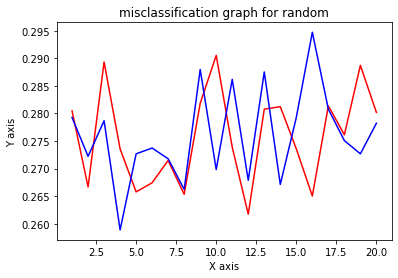

mean misclassification rate for random sample with std for letter
27.576121193940306 0.8483597566911324

mean misclassification rate for markov sample with std for letter
27.604619769011553 0.8421835138019067


In [ ]:
acc=svm_boosting(Data_trainl,Data_testl,'random')
accm=svm_boosting(Data_trainl,Data_testl,'markov')
print(acc)
print(accm)
print()
plt.title("misclassification graph for random")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(1,21), acc, color ="red")  
plt.plot(np.arange(1,21), accm, color ="blue") 
plt.show()
print("mean misclassification rate for random sample with std for letter")
print(100*np.mean(acc),100*np.std(acc))

print("\nmean misclassification rate for markov sample with std for letter")
print(100*np.mean(accm),100*np.std(accm))

In the graph blue plot represents Markov resampling and the red plot represents Random resampling.
And then mean and standard devistion of error is shown.

[0.22066246056782335, 0.21167192429022086, 0.2217665615141956, 0.21608832807570977, 0.21829652996845428, 0.2168769716088328, 0.2149842271293375, 0.21182965299684542, 0.2222397476340694, 0.22381703470031544, 0.2132492113564669, 0.2149842271293375, 0.2178233438485805, 0.20899053627760256, 0.21340694006309147, 0.2137223974763407, 0.21309148264984223, 0.21529968454258674, 0.2100946372239748, 0.21577287066246054]



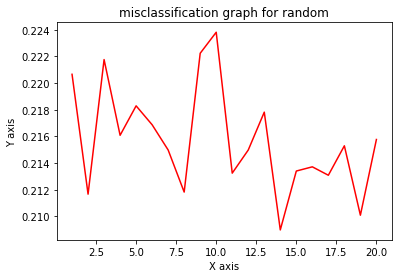

mean misclassification rate for random sample with std for magic
21.573343848580443 0.3960176465958665


In [ ]:
acc=svm_boosting(Data_trainm,Data_testm,'random')
#accm=svm_markov(Data_trainm,Data_testm)
print(acc)
#print(accm)
print()
plt.title("misclassification graph for random")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(1,21), acc, color ="red")  
#plt.plot(np.arange(1,21), accm, color ="blue") 
plt.show()
print("mean misclassification rate for random sample with std for magic")
print(100*np.mean(acc),100*np.std(acc))